In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

X = df[['RM', 'CRIM']].values      
y = df['MEDV'].values.reshape(-1, 1)  

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Test Mean Squared Error: 24.40887101467112


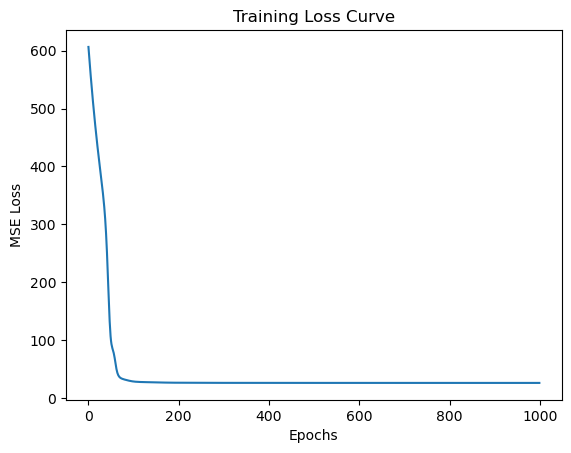

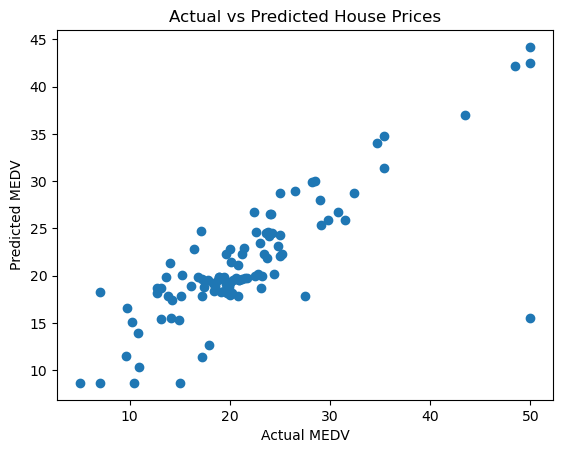

In [10]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def initialize_parameters():
    np.random.seed(42)
    params = {
        "W1": np.random.randn(2, 5) * 0.01,
        "b1": np.zeros((1, 5)),
        "W2": np.random.randn(5, 3) * 0.01,
        "b2": np.zeros((1, 3)),
        "W3": np.random.randn(3, 1) * 0.01,
        "b3": np.zeros((1, 1))
    }
    return params

def forward_propagation(X, params):
    Z1 = X @ params["W1"] + params["b1"]
    A1 = relu(Z1)

    Z2 = A1 @ params["W2"] + params["b2"]
    A2 = relu(Z2)

    Z3 = A2 @ params["W3"] + params["b3"]  # Linear output

    cache = (X, Z1, A1, Z2, A2, Z3)
    return Z3, cache


def mse_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)


def backward_propagation(y, y_pred, cache, params):
    X, Z1, A1, Z2, A2, _ = cache
    m = len(y)

    dZ3 = (y_pred - y) / m
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = dZ3 @ params["W3"].T
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ params["W2"].T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = {
        "dW1": dW1, "db1": db1,
        "dW2": dW2, "db2": db2,
        "dW3": dW3, "db3": db3
    }
    return grads


def gradient_descent_update(params, grads, lr):
    for key in params:
        params[key] -= lr * grads["d" + key]



def train_model(X, y, learning_rate=0.01, epochs=1000):
    params = initialize_parameters()
    losses = []

    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X, params)
        loss = mse_loss(y, y_pred)
        grads = backward_propagation(y, y_pred, cache, params)
        gradient_descent_update(params, grads, learning_rate)
        losses.append(loss)

    return params, losses



params, losses = train_model(
    X_train,
    y_train,
    learning_rate=0.01,
    epochs=1000
)



y_test_pred, _ = forward_propagation(X_test, params)
test_mse = mse_loss(y_test, y_test_pred)

print("Test Mean Squared Error:", test_mse)




plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()